___
# K Means Clustering Project 

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

___

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Import Libraries

** Import the libraries you usually use for data analysis.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [43]:
df = pd.read_csv('College_Data', index_col=0)

**Check the head of the data**

In [20]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Check the info() and describe() methods on the data.**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [22]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA
**scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.**

In [44]:
df['Private'] = [1 if x=='Yes' else 0 for x in df['Private']]

In [89]:
df['Private'].value_counts

<bound method IndexOpsMixin.value_counts of Abilene Christian University      1
Adelphi University                1
Adrian College                    1
Agnes Scott College               1
Alaska Pacific University         1
                                 ..
Worcester State College           0
Xavier University                 1
Xavier University of Louisiana    1
Yale University                   1
York College of Pennsylvania      1
Name: Private, Length: 777, dtype: int64>

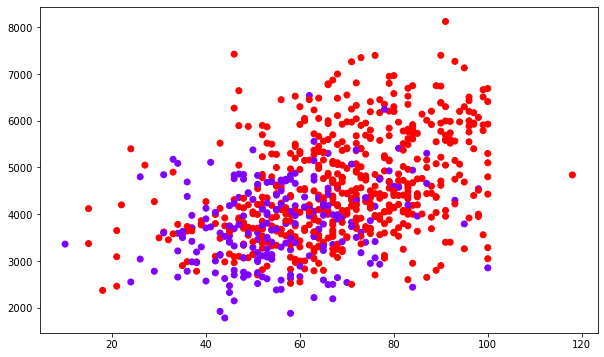

In [48]:
plt.figure(figsize=(10,6))
plt.scatter(df['Grad.Rate'],df['Room.Board'],c=df['Private'], cmap='rainbow')

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

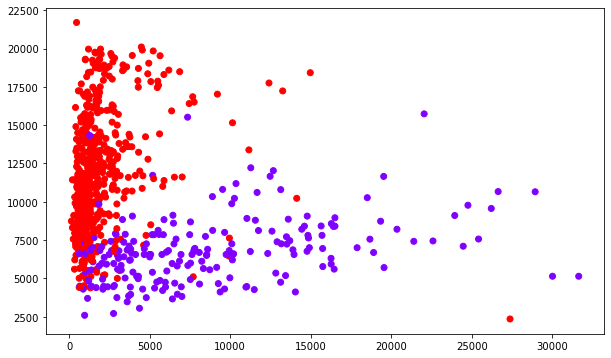

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(df['F.Undergrad'],df['Outstate'],c=df['Private'], cmap='rainbow')

**Create a stacked histogram showing Out of State Tuition based on the Private column**

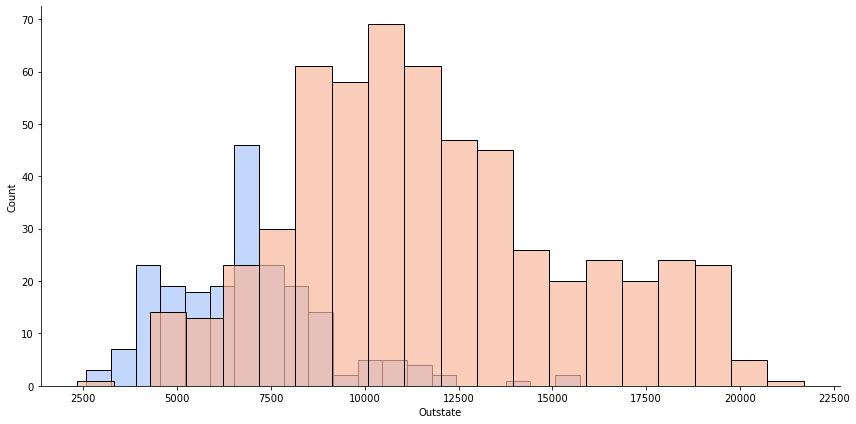

In [65]:
g = sns.FacetGrid(df,hue='Private', height=6, aspect=2, palette='coolwarm')
g.map(sns.histplot,'Outstate', bins= 20, alpha=0.7) 

**Create a similar histogram for the Grad.Rate column.**

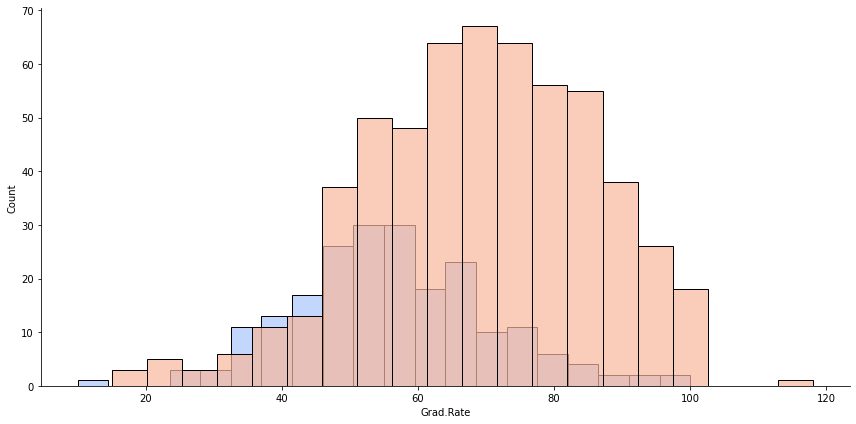

In [67]:
g = sns.FacetGrid(df,hue='Private', height=6, aspect=2, palette='coolwarm')
g.map(sns.histplot,'Grad.Rate', bins= 20, alpha=0.7) 

**We can see that the Graduation Rate is having value more 100 for a private university. Lets uniform it and plot again**

In [68]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,1,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [69]:
df['Grad.Rate'] = [ 100 if x>=100 else x for x in df['Grad.Rate']]

In [70]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


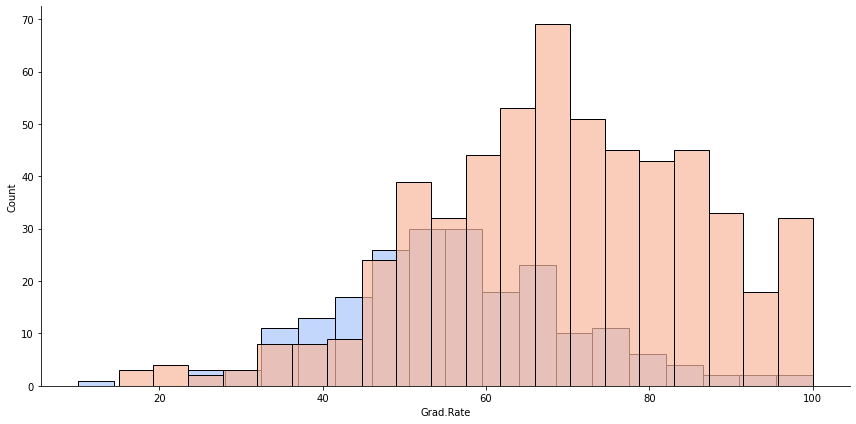

In [71]:
g = sns.FacetGrid(df,hue='Private', height=6, aspect=2, palette='coolwarm')
g.map(sns.histplot,'Grad.Rate', bins= 20, alpha=0.7) 

## K Means Cluster Creation

In [72]:
from sklearn.cluster import KMeans

**Create 2 cluster as we need to determine the universities are Private or not**

In [74]:
kmeans = KMeans(n_clusters=2)

**Fit the model to all the data except for the Private label.**

In [76]:
kmeans.fit(df.drop('Private', axis = 1))

KMeans(n_clusters=2)

**Cluster Centers**

In [77]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

## Evaluation

**There is no perfect way to evaluate clustering if you don't have the labels but we can use Silhouette Score form sklearn.metrics evaluate.
The Silhouette Score attempts to describe how similar a datapoint is to other datapoints in its cluster, relative to datapoints not in its cluster (this is aggregated over all datapoints to get the score for an overall clustering). In other words, it thinks about how ‘distinct’ the clusters are in space — indeed one could use any measure of ‘distance’ to calculate the score.**

**It is bounded between -1 and 1. Closer to -1 suggests incorrect clustering, while closer to +1 shows that each cluster is very dense.**

In [86]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [85]:
silhouette_score(df.drop('Private', axis=1),kmeans.labels_)

0.5599267973651544

**The Calinski Harabaz Index is the ratio of the variance of a datapoint compared to points in other clusters, against the variance compared to points within its cluster. Since we want this first part to be high, and the second part to be low, a high CH index is desirable**

In [96]:
calinski_harabasz_score(df.drop('Private', axis=1),kmeans.labels_)

379.5868305555298

**Since we have the lable columns for this data we can check the accuracy of the clustring**

In [90]:
from sklearn.metrics import confusion_matrix,classification_report

In [95]:
print(confusion_matrix(kmeans.labels_,df['Private']))

[[138 531]
 [ 74  34]]


In [94]:
print(classification_report(kmeans.labels_,df['Private']))

              precision    recall  f1-score   support

           0       0.65      0.21      0.31       669
           1       0.06      0.31      0.10       108

    accuracy                           0.22       777
   macro avg       0.36      0.26      0.21       777
weighted avg       0.57      0.22      0.28       777



# Conclusion

**The K-means clustering algorithm is an unsupervised machine learning technique that groups data points into clusters based on the similarity of their feature values. The algorithm does not rely on any prior knowledge or labels to perform the clustering. One of the key parameters in the K-means algorithm is the number of clusters, denoted as K. While there is no one-size-fits-all value of K that works for every dataset, the elbow method is a commonly used technique to determine a suitable K value. This method involves plotting the K values against the corresponding error rate, which is the sum of squared distances between the data points and their assigned cluster centroids. The elbow point in the plot, where the error rate starts to decrease significantly, can serve as a good estimate of the optimal K value.**

**To evaluate the quality of the clustering, two common metrics are the Silhouette Score and the Calinski Harabasz Score. The Silhouette Score measures how similar each data point is to its own cluster compared to other clusters, with scores ranging from -1 to 1, where higher scores indicate better clustering. The Calinski Harabasz Score, on the other hand, measures the ratio of the between-cluster variance to the within-cluster variance, with higher scores indicating better clustering. These metrics can help assess the effectiveness of the clustering algorithm and guide the selection of the best K value for a given dataset.**